In [65]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [66]:
import os
df = pd.read_csv(os.getcwd() + '/german_credit.csv')
df.shape

(1000, 21)

In [67]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [68]:
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

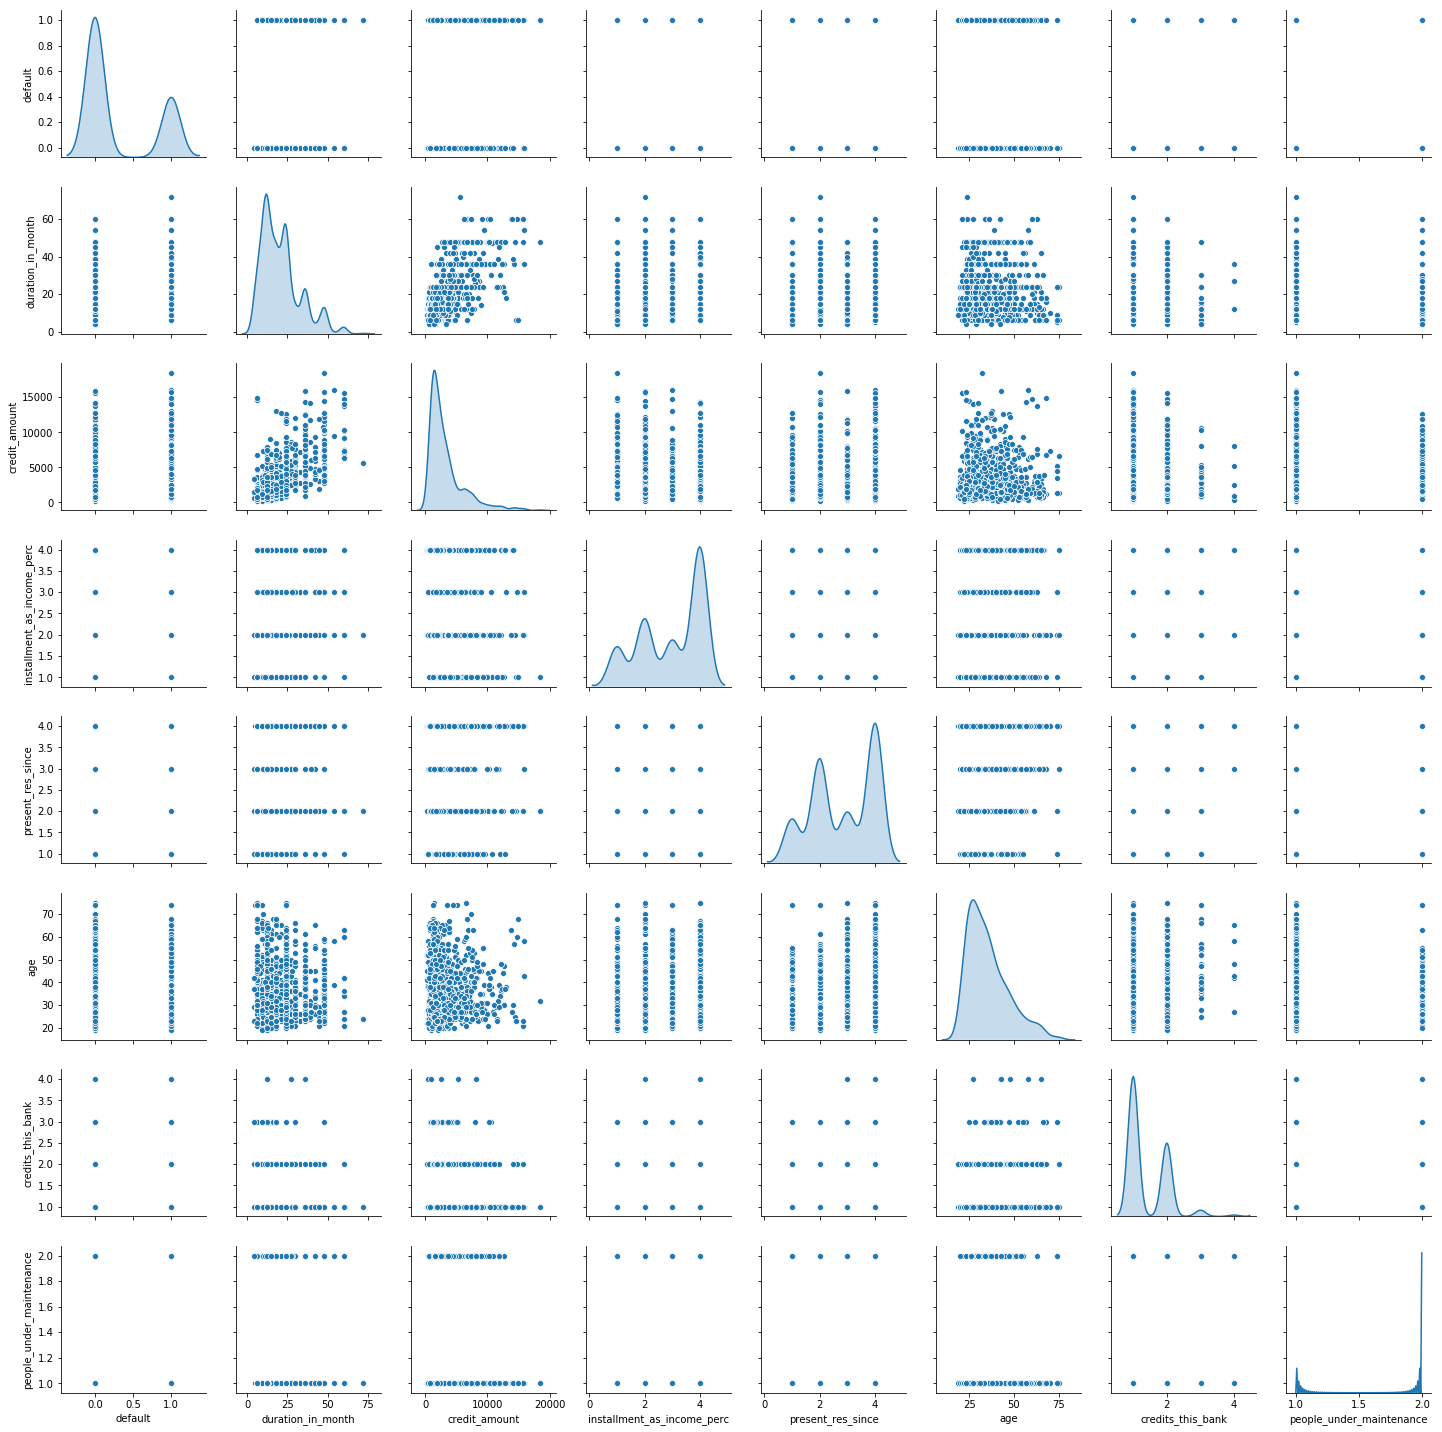

In [69]:
sns.pairplot(df, diag_kind='kde')

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [70]:
from sklearn.model_selection import train_test_split

array = df.values
X = array[:,:-1] #select independent variables only
y = array[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
X_train.shape

(500, 20)

In [71]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [72]:
# Print Shape of model data

### Check for highly correlated variables but don't required any treatment for this use case

In [73]:
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [74]:
pd.get_dummies(df, columns=['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 
                           'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing',
                          'job', 'telephone'])


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker,account_check_status_0 <= ... < 200 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name"
0,0,6,1169,4,4,67,2,1,yes,0,...,0,0,1,0,0,1,0,0,0,1
1,1,48,5951,2,2,22,1,1,yes,1,...,0,0,1,0,0,1,0,0,1,0
2,0,12,2096,2,3,49,1,2,yes,0,...,0,0,1,0,0,0,0,1,1,0
3,0,42,7882,2,4,45,1,2,yes,0,...,0,1,0,0,0,1,0,0,1,0
4,1,24,4870,3,4,53,2,2,yes,0,...,0,1,0,0,0,1,0,0,1,0
5,0,36,9055,2,4,35,1,2,yes,0,...,0,1,0,0,0,0,0,1,0,1
6,0,24,2835,3,4,53,1,1,yes,0,...,0,0,1,0,0,1,0,0,1,0
7,0,36,6948,2,2,35,1,1,yes,1,...,0,0,0,1,1,0,0,0,0,1
8,0,12,3059,2,4,61,1,1,yes,0,...,0,0,1,0,0,0,0,1,1,0
9,1,30,5234,4,2,28,2,1,yes,1,...,0,0,1,0,1,0,0,0,1,0


### Drop the original variables which are converted to dummy

In [75]:
df=df.drop(columns=['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 
                           'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing',
                          'job', 'telephone'])
df.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker
0,0,6,1169,4,4,67,2,1,yes
1,1,48,5951,2,2,22,1,1,yes
2,0,12,2096,2,3,49,1,2,yes
3,0,42,7882,2,4,45,1,2,yes
4,1,24,4870,3,4,53,2,2,yes


In [76]:
df = pd.get_dummies(df, columns=['foreign_worker'])

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [77]:
array = df.values
X = array[:,:-2] #select independent variables only
y = array[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500, random_state=9999, n_jobs=2, criterion = 'entropy')
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [79]:
from sklearn import metrics

print("accurancy of Random forest algorithm => ", rfcl.score(X_test , y_test))
print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

accurancy of Random forest algorithm =>  0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       287
           1       1.00      0.08      0.14        13

   micro avg       0.96      0.96      0.96       300
   macro avg       0.98      0.54      0.56       300
weighted avg       0.96      0.96      0.94       300

[[287   0]
 [ 12   1]]


### Q6 Show the list of the features importance( 1 Marks)

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [81]:
# Use below values
num_folds = 10
seed = 77

In [82]:
#Validate the Random Forest model build above using k fold


In [83]:
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)
print(results)


[0.98 0.94 0.93 0.97 0.96 0.98 0.98 0.99 0.94 0.96]


In [84]:
#Calculate Mean score
print("mean => ", results.mean())

mean =>  0.9629999999999999


In [85]:
# Calculate score standard deviation using std()
print("standard deviation", results.std())

standard deviation 0.019519221295943134


In [86]:
KfoldReg = model.fit(X_train, y_train)
test_pred = KfoldReg.predict(X_test)

# Q8 Print the confusion matrix( 1 Marks)

In [87]:
print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       287
           1       0.00      0.00      0.00        13

   micro avg       0.96      0.96      0.96       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.96      0.94       300

[[287   0]
 [ 13   0]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [88]:
print("accurancy of K fold Linear Regression algorithm => ", KfoldReg.score(X_test , y_test))

accurancy of K fold Linear Regression algorithm =>  0.9566666666666667


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [89]:
#Hint: Use roc_curve
model.predict(X_test)[0:10]
model.predict_proba(X_test)[0:10, :]
model.predict_proba(X_test)[0:10, 1]
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([6.52108114e-02, 1.18119996e-02, 2.93059854e-02, 4.24714188e-03,
       4.74484205e-04, 6.37359497e-02, 1.38149183e-02, 1.11318801e-01,
       5.14242451e-02, 7.81005009e-02, 1.36566736e-03, 1.79549859e-02,
       2.12048149e-03, 4.90065017e-02, 1.91953559e-02, 1.22436908e-02,
       4.02771614e-02, 8.95926810e-03, 1.79651996e-01, 8.75088511e-03,
       1.77746950e-02, 3.84456694e-02, 1.96754101e-02, 4.26103492e-02,
       1.54804935e-02, 5.34190101e-02, 3.70441454e-02, 4.65509438e-02,
       1.94859354e-02, 1.78730969e-04, 2.22468362e-03, 1.77078414e-02,
       3.77968539e-03, 7.15499960e-02, 2.33677806e-02, 2.29585269e-02,
       1.79484010e-03, 9.80161171e-02, 4.37623475e-02, 3.61849167e-02,
       2.27921435e-02, 6.25321666e-02, 2.66110505e-02, 2.68013094e-03,
       2.86172097e-02, 1.57409182e-02, 2.08203255e-02, 1.08878996e-01,
       9.75650226e-03, 3.57062087e-02, 3.57250697e-02, 1.04031765e-01,
       2.00893797e-03, 1.12993891e-03, 5.76461882e-03, 3.32995074e-02,
      

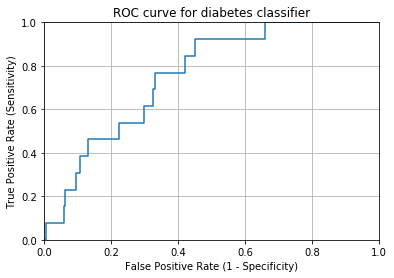

In [90]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

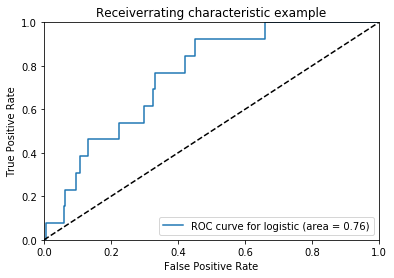

In [91]:
from sklearn.metrics import roc_curve, auc
import pylab as pl
roc_auc = auc(fpr, tpr)
pl.clf()
pl.plot(fpr, tpr, label='ROC curve for logistic (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [92]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [93]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

accuracy=[]
def predict_accuracy(model_name, en_model):
    print(model_name)
    for i in range(bootstrap_iteration):
        X_, y_ = resample(X_train, y_train)
        en_model.fit(X_, y_)
        y_pred = en_model.predict(X_test)

        acc = accuracy_score(y_pred, y_test)
        accuracy.append(acc)
        
        print(accuracy)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

lrcl = LogisticRegression(random_state=1)
rfcl = RandomForestClassifier(n_estimators = 500, random_state=9999, n_jobs=2, criterion = 'entropy')
nbcl = GaussianNB()
bgcl = BaggingClassifier( n_estimators=10)
dt_model = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 5 )

data = [lrcl, rfcl, nbcl, bgcl, dt_model]
lookuptable = {lrcl: 'LogisticRegression', rfcl: 'RandomForestClassifier', nbcl: 'GaussianNB', bgcl : 'BaggingClassifier', dt_model : 'DecisionTreeClassifier'}
for i in data:
    predict_accuracy(lookuptable[i], i)

LogisticRegression
[0.9566666666666667]
[0.9566666666666667, 0.9566666666666667]
[0.9566666666666667, 0.9566666666666667, 0.9566666666666667]
[0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9566666666666667]
[0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334]
[0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334, 0.9566666666666667]
[0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334, 0.9566666666666667, 0.9566666666666667]
[0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334]
[0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334, 0.9533333333333334]
[0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.956666666

In [95]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Average: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Average:  0.9470000000000001
Standard deviation:  0.023825756371344577


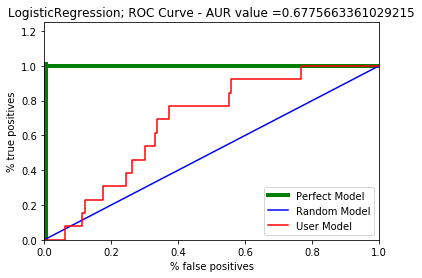

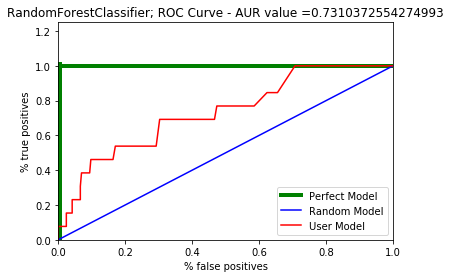

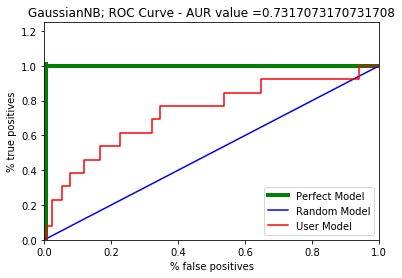

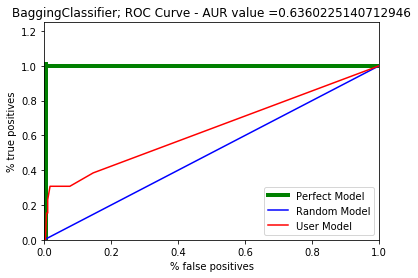

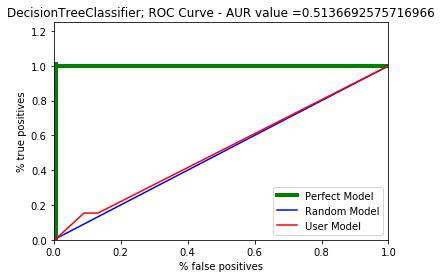

In [96]:
def roccurve(model, y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title(model+"; ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()

data = [lrcl, rfcl, nbcl, bgcl, dt_model]
lookuptable = {lrcl: 'LogisticRegression', rfcl: 'RandomForestClassifier', nbcl: 'GaussianNB', bgcl : 'BaggingClassifier', dt_model : 'DecisionTreeClassifier'}
for i in data:
    test_pred_proba = i.predict_proba(X_test)
    roccurve(lookuptable[i], y_test, test_pred_proba[:,1])